# ***DECISION TREES***

### ***Cancer dataset***

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import f1_score
from sklearn.tree import export_graphviz
import graphviz
import pickle
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import os 

In [2]:
data_breast_cancer = datasets.load_breast_cancer(as_frame=True)

In [3]:
X_cancer = data_breast_cancer.data
y_cancer = data_breast_cancer.target

In [4]:
X_cancer_train, X_cancer_test, y_cancer_train, y_cancer_test = train_test_split(X_cancer, y_cancer, test_size=0.2, random_state=42)

In [5]:
X_cancer_train_texture_symmetry = X_cancer_train[["mean texture", "mean symmetry"]]
X_cancer_test_texture_symmetry = X_cancer_test[["mean texture", "mean symmetry"]]

In [6]:
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)

***TRAIN SET***

In [7]:
tree_clf.fit(X_cancer_train_texture_symmetry, y_cancer_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [8]:
y_cancer_train_pred = tree_clf.predict(X_cancer_train_texture_symmetry)

In [9]:
f1_score_train = f1_score(y_cancer_train_pred, y_cancer_train)

In [10]:
print(f1_score_train)

0.8211243611584327


***TEST SET***

In [11]:
y_cancer_test_pred = tree_clf.predict(X_cancer_test_texture_symmetry)

In [12]:
f1_score_test = f1_score(y_cancer_test_pred, y_cancer_test)

In [13]:
print(f1_score_test)

0.7887323943661971


***png***

In [14]:
f = "bc.dot"

In [15]:
export_graphviz(tree_clf,
                out_file=f,
                feature_names=['mean texture', 'mean symmetry'],
                class_names=[str(num)+", "+name
                             for num,name in
                             zip(set(y_cancer), data_breast_cancer.target_names)],
                rounded=True,
                filled=True)

In [16]:
graphviz.render('dot', 'png', f)

'bc.dot.png'

In [17]:
os.rename('bc.dot.png', 'bc.png')

In [18]:
acc_tree_clf_train = accuracy_score(y_cancer_train, y_cancer_train_pred)

In [19]:
acc_tree_clf_test = accuracy_score(y_cancer_test, y_cancer_test_pred)

In [20]:
f1acc_tree = [tree_clf.max_depth, f1_score_train, f1_score_test, acc_tree_clf_train, acc_tree_clf_test]

In [21]:
with open('f1acc_tree.pkl', 'wb') as f:
    pickle.dump(f1acc_tree, f)

In [22]:
print(f1acc_tree)

[3, 0.8211243611584327, 0.7887323943661971, 0.7692307692307693, 0.7368421052631579]


## ***REGRESSION***

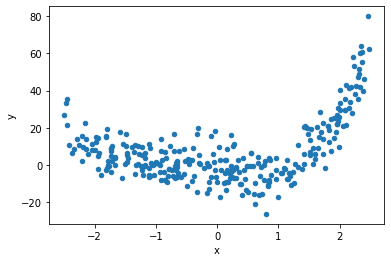

In [23]:
size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4
df = pd.DataFrame({'x': X, 'y': y})
df.plot.scatter(x='x',y='y')

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
tree_reg = DecisionTreeRegressor(max_depth=3, random_state=42)

In [26]:
X_train = X_train.reshape(-1, 1)

In [27]:
tree_reg.fit(X_train, y_train)

y_train_pred = tree_reg.predict(X_train)

In [28]:
mse_train = mean_squared_error(y_train_pred, y_train)

In [29]:
X_test = X_test.reshape(-1, 1)

y_test_pred = tree_reg.predict(X_test)

mse_test = mean_squared_error(y_test_pred, y_test)

In [30]:
df.columns

Index(['x', 'y'], dtype='object')

In [31]:
g = "reg.dot"

In [32]:
export_graphviz(tree_reg,
                out_file=g,
                feature_names=['x'],
                class_names=[str(num)+", "+name
                             for num,name in
                             zip(set(y), ['x'])],
                rounded=True,
                filled=True)

In [33]:
graphviz.render('dot', 'png', g)

'reg.dot.png'

In [34]:
os.rename('reg.dot.png', 'reg.png')

In [35]:
mse_tree = [tree_reg.max_depth, mse_train, mse_test]

In [37]:
with open('mse_tree.pkl', 'wb') as f:
    pickle.dump(mse_tree, f)